In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import pyplot
import nltk
import seaborn as sns
import csv
import os
import scipy
from scipy import stats



Bad key text.latex.preview in file C:\Users\PeterDell\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\PeterDell\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\PeterDell\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.

In [2]:
def plot_figure(data,subject,label):
    fig= plt.figure(figsize=(18,6))
    plt.suptitle('Subject: '+ subject+ '  Path: ' +label)
    # Cut your window in 1 row and 2 columns, and start a plot in the first part
    plt.subplot(131)
    plt.hist(data[0], 8, alpha=0.5, label='Expected')
    plt.hist(data[1], 8, alpha=0.5, label='Related')
    plt.hist(data[2], 8, alpha=0.5, label='Unrelated')

    # Add title and axis names
    plt.title('Sentence Context')
    plt.xlabel('Semantic Relatedness')
    plt.ylabel('Instances')
    plt.legend(loc='best')
    #plt.xlim(0.46, 0.55)
    #plt.ylim(0, 17)

    # And now add something in the second part:
    plt.subplot(132)
    plt.hist(data[3], 8, alpha=0.5, label='Expected')
    plt.hist(data[4], 8, alpha=0.5, label='Related')
    plt.hist(data[5], 8, alpha=0.5, label='Unrelated')

    # Add title and axis names
    plt.title('Discourse Context')
    plt.xlabel('Semantic Relatedness')
    plt.ylabel('Instances')
    plt.legend(loc='best')

    #plt.xlim(0.46, 0.55)
    #plt.ylim(0, 17)

    # now 

    ax = fig.add_subplot(133)


    # Create the boxplot
    bp = ax.boxplot(data.T)

    ax.set_xticklabels(['S-E', 'S-R', 'S-U', 'D-E', 'D-R', 'D-U'])
    # Add title and axis names
    plt.title('Sentence            Discourse')
    plt.xlabel('Target words in Sentence vs Discourse')
    plt.ylabel('Semantic Relatedness')
    #fig.tight_layout()

    #plt.savefig('connectome_inference/figures/subject_%s_%s.png' % (subject,label))


In [3]:
sublist = [ f.name for f in os.scandir('C:/data/for_Peter') if f.is_dir() ]

In [4]:
print(sublist[:20])

['100206', '100307', '100408', '100610', '101006', '101107', '101309', '101410', '101915', '102008', '102109', '102311', '102513', '102614', '102715', '102816', '103010', '103111', '103212', '103414']


In [5]:
sub_count=11
summary_none=np.zeros([6,sub_count])
summary_mlf=np.zeros([6,sub_count])
summary_ifo=np.zeros([6,sub_count])
summary_af=np.zeros([6,sub_count])

summary_none_c=np.zeros([6,sub_count])
summary_mlf_c=np.zeros([6,sub_count])
summary_ifo_c=np.zeros([6,sub_count])
summary_af_c=np.zeros([6,sub_count])

In [6]:
summary_none == summary_none_c

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]])

In [7]:
# this is the main loop across subjects
scount=0
for subject in sublist[:sub_count]:
    bundle_name="None_control_True"
    data = np.load('connectome_inference_control/subject_%s_path_%s.npy' % (subject,bundle_name))
    for i in range(len(data)):
        summary_none_c[i,scount] = np.mean([data[i]])
  
    bundle_name="MLF_left_control_True"
    data = np.load('connectome_inference_control/subject_%s_path_%s.npy' % (subject,bundle_name))
    for i in range(len(data)):
        summary_mlf_c[i,scount] = np.mean([data[i]])

    bundle_name="IFO_left_control_True"
    data = np.load('connectome_inference_control/subject_%s_path_%s.npy' % (subject,bundle_name))
    for i in range(len(data)):
        summary_ifo_c[i,scount] = np.mean([data[i]])
        
    bundle_name="AF_left_control_True"
    data = np.load('connectome_inference_control/subject_%s_path_%s.npy' % (subject,bundle_name))
    for i in range(len(data)):
        summary_af_c[i,scount] = np.mean([data[i]])
    scount=scount+1
  

In [8]:
# this is the main loop across subjects
scount=0
for subject in sublist[:sub_count]:
    bundle_name="None_new_esb"
    data = np.load('connectome_inference_check/subject_%s_path_%s.npy' % (subject,bundle_name))
    for i in range(len(data)):
        summary_none[i,scount] = np.mean([data[i]])
  
    bundle_name="MLF_left_new_esb"
    data = np.load('connectome_inference_check/subject_%s_path_%s.npy' % (subject,bundle_name))
    for i in range(len(data)):
        summary_mlf[i,scount] = np.mean([data[i]])

    bundle_name="IFO_left_new_esb"
    data = np.load('connectome_inference_check/subject_%s_path_%s.npy' % (subject,bundle_name))
    for i in range(len(data)):
        summary_ifo[i,scount] = np.mean([data[i]])
        
    bundle_name="AF_left_new_esb"
    data = np.load('connectome_inference_check/subject_%s_path_%s.npy' % (subject,bundle_name))
    for i in range(len(data)):
        summary_af[i,scount] = np.mean([data[i]])
    scount=scount+1
  

In [9]:
print(summary_af.T)

[[0.84163503 0.83271542 0.82853465 0.83529873 0.82718905 0.81285739]
 [0.8421852  0.83328768 0.82911834 0.83586048 0.82776981 0.81349743]
 [0.84203748 0.83312999 0.82895764 0.83570244 0.82760377 0.81331975]
 [0.84213091 0.8332458  0.82907531 0.83579782 0.82771702 0.81343691]
 [0.8424049  0.83354046 0.82937587 0.8360802  0.82801284 0.81375915]
 [0.84154052 0.83261028 0.82843011 0.83519352 0.82707929 0.8127486 ]
 [0.84150195 0.83256584 0.82838543 0.83515604 0.82703269 0.81270209]
 [0.84197515 0.83308854 0.82891308 0.83563583 0.82755366 0.81326123]
 [0.84187045 0.83297287 0.82879967 0.83552955 0.82743947 0.81314001]
 [0.84173531 0.83283473 0.82865799 0.83538837 0.82729869 0.81298784]
 [0.8415464  0.83260588 0.82842498 0.83519613 0.82706856 0.81273121]]


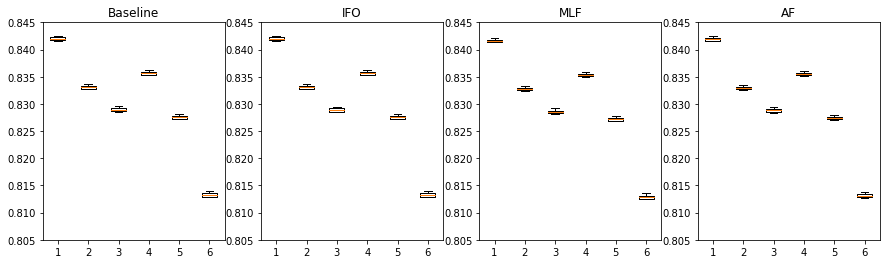

In [10]:
fig= plt.figure(figsize=(15,4))
data1=(summary_ifo - summary_none)*10000
data2=(summary_mlf - summary_none)*10000
data3=-(data2-data1)
plt.subplot(141)
plt.title('Baseline')
plt.boxplot(summary_none.T)
plt.ylim(0.805,0.845)
plt.subplot(142)
plt.title('IFO')
plt.boxplot(summary_ifo.T)
plt.ylim(0.805,0.845)
plt.subplot(143)
plt.title('MLF')
plt.boxplot(summary_mlf.T)
plt.ylim(0.805,0.845)
plt.subplot(144)
plt.title('AF')
plt.boxplot(summary_af.T)
plt.ylim(0.805,0.845)
#plt.boxplot(data2.T)
plt.show()

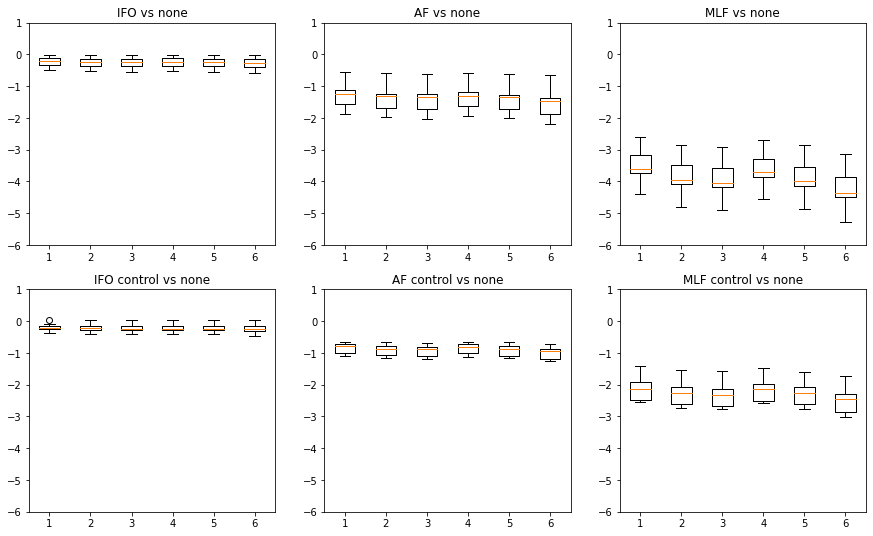

In [11]:
fig= plt.figure(figsize=(15,9))
data1=(summary_ifo - summary_none)*10000
data2=(summary_mlf - summary_none)*10000
data3=(summary_af - summary_none)*10000

data4=(summary_ifo_c - summary_none_c)*10000
data5=(summary_mlf_c - summary_none_c)*10000
data6=(summary_af_c - summary_none_c)*10000


min=-6
max=1
plt.subplot(231)
plt.title('IFO vs none')
plt.boxplot(data1.T)
plt.ylim(min,max)
plt.subplot(232)
plt.title('AF vs none')
plt.ylim(min,max)
plt.boxplot(data3.T)
plt.subplot(233)
plt.title('MLF vs none')
plt.boxplot(data2.T)
plt.ylim(min,max)


plt.subplot(234)
plt.title('IFO control vs none')
plt.boxplot(data4.T)
plt.ylim(min,max)
plt.subplot(235)
plt.title('AF control vs none')
plt.ylim(min,max)
plt.boxplot(data6.T)
plt.subplot(236)
plt.title('MLF control vs none')
plt.boxplot(data5.T)
plt.ylim(min,max)

plt.show()

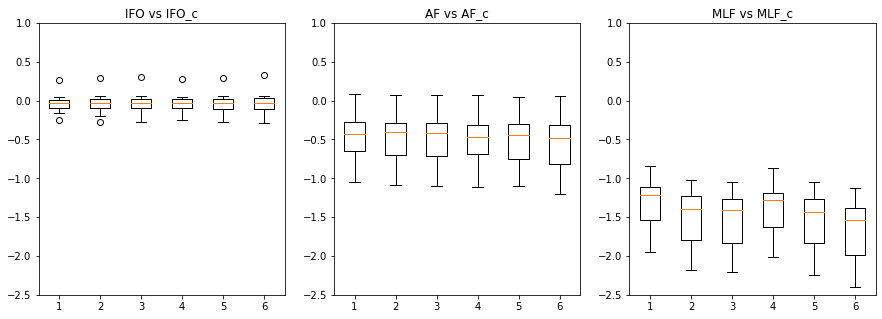

In [12]:
fig= plt.figure(figsize=(15,5))
data1=(summary_ifo - summary_ifo_c)*10000
data2=(summary_af - summary_af_c)*10000
data3=(summary_mlf - summary_mlf_c)*10000



min=-2.5
max=1
plt.subplot(131)
plt.title('IFO vs IFO_c')
plt.boxplot(data1.T)
plt.ylim(min,max)
plt.subplot(132)
plt.title('AF vs AF_c')
plt.ylim(min,max)
plt.boxplot(data2.T)
plt.subplot(133)
plt.title('MLF vs MLF_c')
plt.boxplot(data3.T)
plt.ylim(min,max)


plt.show()

In [13]:
data=data1

In [14]:
print('t-test: for BC vs EF: ', stats.ttest_ind(data[1],data[2]))
print('t-test: for AB vs DE: ', stats.ttest_ind(data[4],data[5]))

t-test: for BC vs EF:  Ttest_indResult(statistic=-0.002767212096205612, pvalue=0.997819502961693)
t-test: for AB vs DE:  Ttest_indResult(statistic=0.022681176603161764, pvalue=0.9821293594447006)


In [15]:
print('t-test: for BC vs EF: ', stats.ttest_ind(data[1]-data[2], data[4]-data[5]))
print('t-test: for AB vs DE: ', stats.ttest_ind(data[0]-data[1], data[3]-data[4]))

t-test: for BC vs EF:  Ttest_indResult(statistic=-0.3436875588095176, pvalue=0.7346680887569932)
t-test: for AB vs DE:  Ttest_indResult(statistic=-0.5466767805256751, pvalue=0.5906485255957518)


In [16]:
print('t-test: for BC vs EF: ', stats.ttest_rel(data1[0]-data1[1], data2[0]-data2[1]))
print('t-test: for AB vs DE: ', stats.ttest_rel(data1[4]-data1[5], data2[4]-data2[5]))

t-test: for BC vs EF:  Ttest_relResult(statistic=-1.7277879577917044, pvalue=0.11472349608416255)
t-test: for AB vs DE:  Ttest_relResult(statistic=-2.9379036550588506, pvalue=0.01483865883662709)


In [17]:
print('t-test: for BC vs EF: ', stats.ttest_rel(data2[0]-data2[1], data3[0]-data3[1]))
print('t-test: for AB vs DE: ', stats.ttest_rel(data2[4]-data2[5], data3[4]-data3[5]))

t-test: for BC vs EF:  Ttest_relResult(statistic=-6.249506569571591, pvalue=9.511339696142763e-05)
t-test: for AB vs DE:  Ttest_relResult(statistic=-6.045682058015358, pvalue=0.00012431875528379237)


In [18]:
data=data3
print('t-test: for BC vs EF: ', stats.ttest_ind(data[1]-data[2], data[4]-data[5]))
print(np.mean(data[1]),np.mean(data[2]), np.mean(data[4]), np.mean(data[5]))
print('t-test: for AB vs DE: ', stats.ttest_ind(data[0]-data[1], data[3]-data[4]))
print(np.mean([data[0]-data[1]]),np.mean([data[3]-data[4]]))


t-test: for BC vs EF:  Ttest_indResult(statistic=-7.317811989285052, pvalue=4.490058218350766e-07)
-1.514764785232048 -1.5503313584732468 -1.5496349803703877 -1.6779397846425603
t-test: for AB vs DE:  Ttest_indResult(statistic=0.9440358703912664, pvalue=0.35641697189785393)
0.17543380987623938 0.14181684686829435


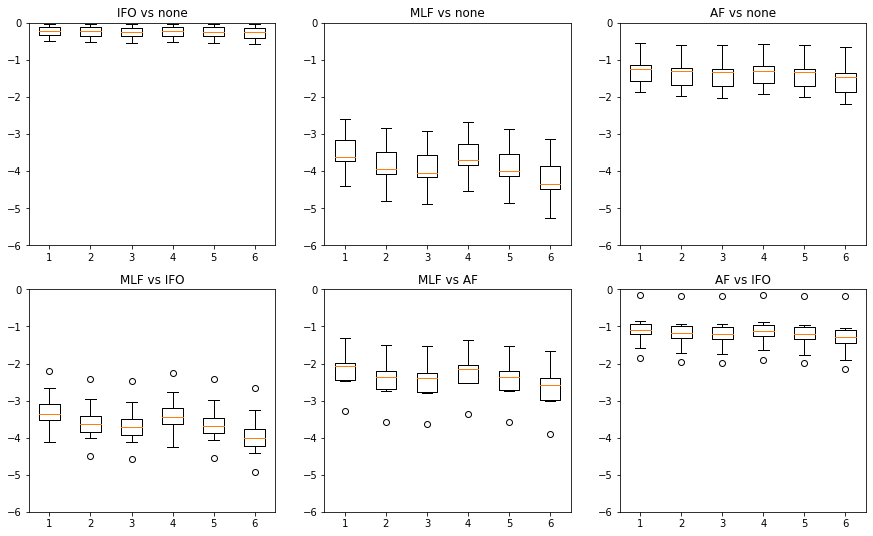

In [19]:
fig= plt.figure(figsize=(15,9))
data1=(summary_ifo - summary_none)*10000
data2=(summary_mlf - summary_none)*10000
data3=(summary_af - summary_none)*10000

data4=(summary_mlf - summary_ifo)*10000
data5=(summary_mlf - summary_af)*10000
data6=(summary_af - summary_ifo)*10000

min=-6
max=0
plt.subplot(231)
plt.title('IFO vs none')
plt.boxplot(data1.T)
plt.ylim(min,max)
plt.subplot(232)
plt.title('MLF vs none')
plt.boxplot(data2.T)
plt.ylim(min,max)
plt.subplot(233)
plt.title('AF vs none')
plt.ylim(min,max)
plt.boxplot(data3.T)

plt.subplot(234)
plt.title('MLF vs IFO')
plt.boxplot(data4.T)
plt.ylim(min,max)
plt.subplot(235)
plt.title('MLF vs AF')
plt.boxplot(data5.T)
plt.ylim(min,max)
plt.subplot(236)
plt.title('AF vs IFO')
plt.boxplot(data6.T)
plt.ylim(min,max)

#plt.boxplot(data2.T)
plt.show()

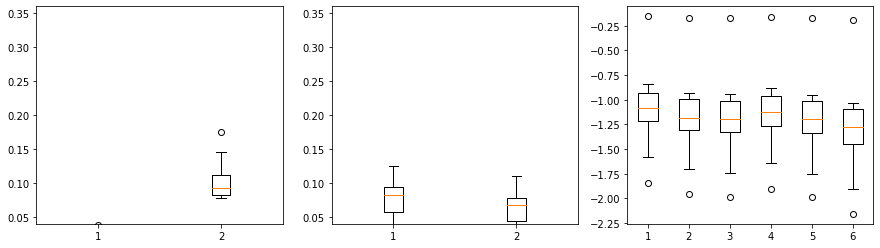

In [20]:
data=data6
fig= plt.figure(figsize=(15,4))
plt.subplot(131)
plt.boxplot([data[1]-data[2], data[4]-data[5]])
plt.ylim(0.04, 0.36)
plt.subplot(132)
plt.boxplot([data[0]-data[1], data[3]-data[4]])
plt.ylim(0.04, 0.36)
plt.subplot(133)
plt.boxplot(data.T)
plt.show()

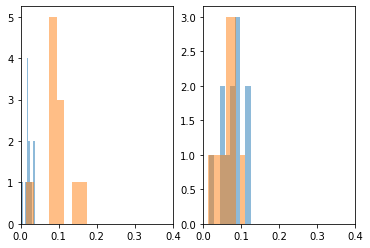

In [21]:
plt.subplot(121)
plt.hist(data[1]-data[2], 8, alpha=0.5, label='Expected')
plt.hist(data[4]-data[5], 8, alpha=0.5, label='Related')
plt.xlim(0, 0.4)
plt.subplot(122)
plt.hist(data[0]-data[1], 8, alpha=0.5, label='Expected')
plt.hist(data[3]-data[4], 8, alpha=0.5, label='Related')
plt.xlim(0, 0.4)

plt.show()

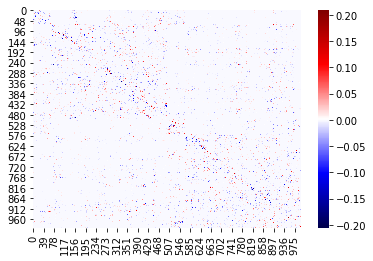

In [22]:
connectome = np.load("Exp3B_connectome.npy")
sns.heatmap(connectome,cmap='seismic')
plt.show()

In [23]:
data=[[0.4809491 , 0.56275326, 0.51666236, 0.52702385, 0.43499371,
       0.34171075, 0.63414431, 0.48155484, 0.42182752, 0.56027937,
       0.68268985, 0.43029863, 0.52706367, 0.5547989 , 0.65555596,
       0.50433165, 0.46771517, 0.53487313, 0.44168794, 0.35617054,
       0.65962791, 0.35605738, 0.61685508, 0.49041963, 0.42500064,
       0.43583053, 0.56063443, 0.46093348, 0.59639007, 0.36052462,
       0.38207176, 0.4467535 , 0.52768517, 0.48511219, 0.4866024 ,
       0.6559478 , 0.50814891, 0.42955735, 0.36394322, 0.46522093,
       0.48285979, 0.68086046, 0.46994284, 0.6417582 , 0.47556213,
       0.6228565 , 0.5976789 , 0.50153321, 0.53689516, 0.56438893,
       0.34399694, 0.32896101, 0.30747589, 0.37191987, 0.49656135,
       0.4758608 , 0.70358533, 0.47139907, 0.40974364, 0.50968665,
       0.55057317, 0.52001739, 0.4898169 , 0.67565501, 0.56439811,
       0.67085522, 0.43082869, 0.52919543, 0.54470444, 0.61396694,
       0.62307   , 0.34388927], [0.51204991, 0.48733613, 0.49471185, 0.35201165, 0.4989579 ,
       0.37787211, 0.43230858, 0.35844687, 0.38005257, 0.55745953,
       0.48913166, 0.38625988, 0.53390014, 0.35763618, 0.53928477,
       0.41832799, 0.59449333, 0.48927328, 0.45481974, 0.31662709,
       0.52150947, 0.45664793, 0.33995762, 0.40212396, 0.38905624,
       0.45133916, 0.41828841, 0.50497979, 0.4728564 , 0.35177967,
       0.41390267, 0.38942161, 0.52427316, 0.33398473, 0.40311202,
       0.39203644, 0.54719251, 0.43591061, 0.41431153, 0.5395599 ,
       0.39969042, 0.45351198, 0.56588632, 0.44963267, 0.45852193,
       0.42653748, 0.38027763, 0.451267  , 0.37279284, 0.51096541,
       0.33364567, 0.32323658, 0.50589907, 0.35373101, 0.5119037 ,
       0.42963535, 0.45223096, 0.38782588, 0.56356299, 0.34890378,
       0.54298097, 0.34799042, 0.39507067, 0.46984538, 0.45611525,
       0.52739918, 0.42404878, 0.48787653, 0.4089185 , 0.52137351,
       0.43241853, 0.35925648], [0.40523922, 0.44752586, 0.34347713, 0.40633035, 0.39754248,
       0.34312588, 0.33533227, 0.47159022, 0.42524907, 0.53955698,
       0.51591378, 0.35178545, 0.44869158, 0.36675864, 0.35631055,
       0.38616341, 0.499264  , 0.45005125, 0.41110897, 0.37203282,
       0.42203286, 0.5698933 , 0.36767796, 0.37665796, 0.35333335,
       0.46735242, 0.39585024, 0.3962642 , 0.4125087 , 0.4571147 ,
       0.46008387, 0.44580936, 0.40698615, 0.44174314, 0.54091537,
       0.38214236, 0.42522085, 0.39727989, 0.39109081, 0.42757928,
       0.3686623 , 0.47837523, 0.39759853, 0.45949197, 0.52027732,
       0.36225277, 0.36770567, 0.45535141, 0.4059445 , 0.44877198,
       0.41697928, 0.35024589, 0.44839418, 0.25774443, 0.44921252,
       0.36189005, 0.41974553, 0.36486021, 0.34757322, 0.31594884,
       0.38363838, 0.41270235, 0.32125157, 0.36995384, 0.42455524,
       0.31999192, 0.40497378, 0.47460055, 0.41901088, 0.47039735,
       0.44404647, 0.41777599], [0.55859447, 0.50560743, 0.44852412, 0.53713316, 0.53783   ,
       0.48858491, 0.6033181 , 0.56115794, 0.41888696, 0.53187889,
       0.70141029, 0.48819214, 0.55779374, 0.51497316, 0.61725873,
       0.5039264 , 0.50607979, 0.54170263, 0.44821444, 0.59013218,
       0.69583988, 0.42382386, 0.63509953, 0.48495001, 0.488819  ,
       0.51748896, 0.58731937, 0.52118391, 0.57699418, 0.45580289,
       0.46936175, 0.51010293, 0.66164774, 0.48895669, 0.5678941 ,
       0.63233227, 0.49693492, 0.49662489, 0.43048501, 0.53370297,
       0.520078  , 0.58275717, 0.52071726, 0.57943559, 0.70687652,
       0.60556275, 0.58781976, 0.58454287, 0.59389788, 0.49175939,
       0.43825182, 0.42795318, 0.39171213, 0.56066394, 0.55440289,
       0.51569045, 0.64970821, 0.56108046, 0.53954566, 0.53349364,
       0.51481336, 0.58524859, 0.55649036, 0.72527087, 0.61236238,
       0.56031984, 0.48768795, 0.56645817, 0.46027756, 0.58064836,
       0.55161387, 0.45255613], [0.55406868, 0.57488239, 0.54690325, 0.48345023, 0.569022  ,
       0.43489271, 0.52860165, 0.51879537, 0.42511073, 0.58940375,
       0.53642213, 0.42059103, 0.57159263, 0.48380563, 0.57267582,
       0.43201828, 0.54435521, 0.6102671 , 0.49756286, 0.42969447,
       0.54602504, 0.53364348, 0.36017588, 0.49338287, 0.57006633,
       0.49416572, 0.42595857, 0.60639393, 0.58634555, 0.45029232,
       0.53857648, 0.56289721, 0.51231498, 0.43544954, 0.5361132 ,
       0.52751172, 0.60924274, 0.52959085, 0.56397486, 0.58808351,
       0.59922111, 0.48501658, 0.65722871, 0.47682533, 0.52176064,
       0.44252014, 0.51252633, 0.52596265, 0.5070765 , 0.56694424,
       0.49082536, 0.43684173, 0.59280974, 0.53822303, 0.55473834,
       0.54374772, 0.47000733, 0.55343926, 0.5453465 , 0.53439188,
       0.6600188 , 0.50148618, 0.47991613, 0.50639111, 0.60062283,
       0.47441179, 0.50027388, 0.54430848, 0.53400677, 0.48980922,
       0.5970794 , 0.55715841], [0.4210102 , 0.46993783, 0.46874106, 0.43755522, 0.49430808,
       0.45269835, 0.43660271, 0.57547587, 0.49655193, 0.62962484,
       0.54766756, 0.38405335, 0.44911498, 0.42681274, 0.49378845,
       0.38293383, 0.47987682, 0.4927676 , 0.48209816, 0.50440729,
       0.47457835, 0.57961482, 0.35261264, 0.43341839, 0.38367069,
       0.54147559, 0.45526189, 0.43601844, 0.47936678, 0.51174754,
       0.50694013, 0.44678107, 0.39328489, 0.51325613, 0.50167501,
       0.44915578, 0.48458034, 0.43099877, 0.52866548, 0.44236597,
       0.50254321, 0.47889686, 0.45833051, 0.4823516 , 0.49593326,
       0.42197102, 0.35581917, 0.53097856, 0.46856019, 0.53641123,
       0.47491288, 0.40644717, 0.46268952, 0.45908567, 0.47351196,
       0.37777895, 0.50243437, 0.4483318 , 0.40512294, 0.33287725,
       0.43693972, 0.48145029, 0.39410722, 0.5344246 , 0.44313836,
       0.29313606, 0.45898864, 0.49938774, 0.39198187, 0.46161777,
       0.53909236, 0.41670775]]

#graphic 


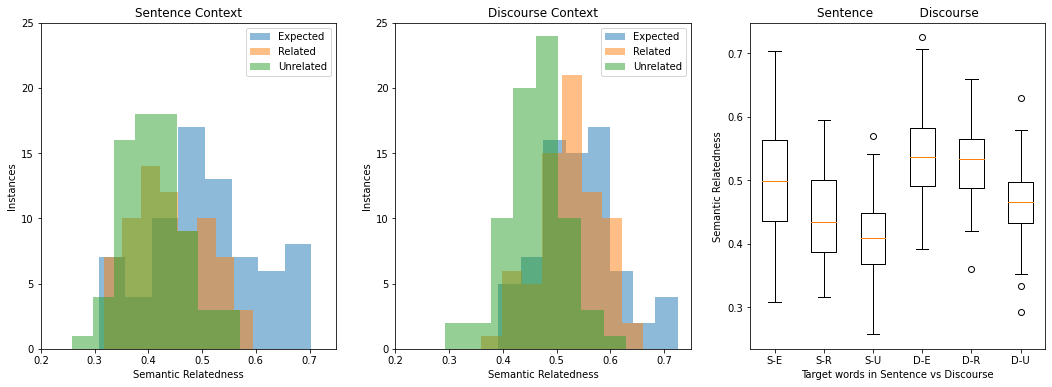

In [24]:
# graphic for average vector test 

# this is for the single reservoir
fig= plt.figure(figsize=(18,6))
plt.title('Average Vector')

# Cut your window in 1 row and 2 columns, and start a plot in the first part
plt.subplot(131)
plt.hist(data[0], 8, alpha=0.5, label='Expected')
plt.hist(data[1], 8, alpha=0.5, label='Related')
plt.hist(data[2], 8, alpha=0.5, label='Unrelated')

# Add title and axis names
plt.title('Sentence Context')
plt.xlabel('Semantic Relatedness')
plt.ylabel('Instances')
plt.legend(loc='best')

plt.xlim(0.2, 0.75)
plt.ylim(0, 25)
 
# And now add something in the second part:
plt.subplot(132)
plt.hist(data[3], 8, alpha=0.5, label='Expected')
plt.hist(data[4], 8, alpha=0.5, label='Related')
plt.hist(data[5], 8, alpha=0.5, label='Unrelated')

# Add title and axis names
plt.title('Discourse Context')
plt.xlabel('Semantic Relatedness')
plt.ylabel('Instances')
plt.legend(loc='best')

plt.xlim(0.2, 0.75)
plt.ylim(0, 25)
 
 
# now 

ax = fig.add_subplot(133)


# Create the boxplot
bp = ax.boxplot(data)

ax.set_xticklabels(['S-E', 'S-R', 'S-U', 'D-E', 'D-R', 'D-U'])
# Add title and axis names
plt.title('Sentence            Discourse')
plt.xlabel('Target words in Sentence vs Discourse')
plt.ylabel('Semantic Relatedness')
#fig.tight_layout()

plt.savefig('Metusalem-average-RADICAL.png')

In [25]:
#heatmap!!

import numpy as np
import matplotlib
import matplotlib.pyplot as plt


AttributeError: 'list' object has no attribute 'T'

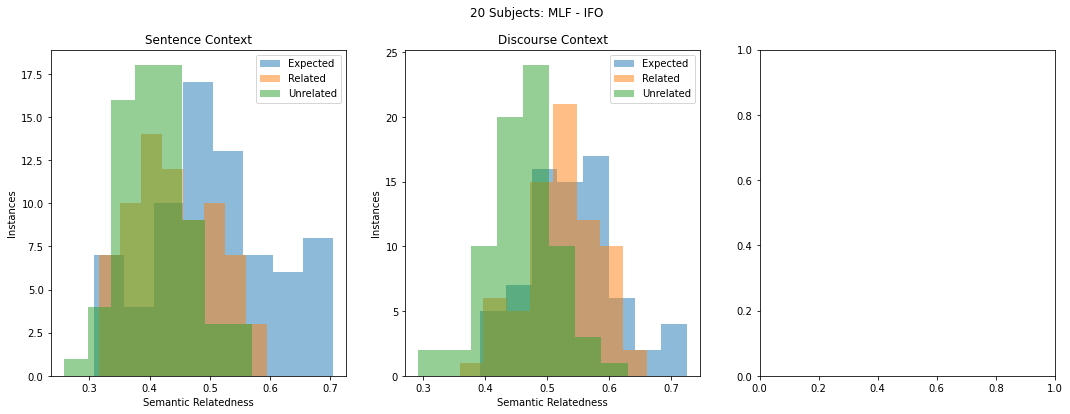

In [26]:
# this is for the single reservoir
fig= plt.figure(figsize=(18,6))
plt.suptitle('20 Subjects: MLF - IFO')

# Cut your window in 1 row and 2 columns, and start a plot in the first part
plt.subplot(131)
plt.hist(data[0], 8, alpha=0.5, label='Expected')
plt.hist(data[1], 8, alpha=0.5, label='Related')
plt.hist(data[2], 8, alpha=0.5, label='Unrelated')

# Add title and axis names
plt.title('Sentence Context')
plt.xlabel('Semantic Relatedness')
plt.ylabel('Instances')
plt.legend(loc='best')
#plt.xlim(0.35, 0.75)
#plt.ylim(0, 30)
 
# And now add something in the second part:
plt.subplot(132)
plt.hist(data[3], 8, alpha=0.5, label='Expected')
plt.hist(data[4], 8, alpha=0.5, label='Related')
plt.hist(data[5], 8, alpha=0.5, label='Unrelated')

# Add title and axis names
plt.title('Discourse Context')
plt.xlabel('Semantic Relatedness')
plt.ylabel('Instances')
plt.legend(loc='best')

#plt.xlim(0.35, 0.75)
#plt.ylim(0, 30)
 
 
# now 

ax = fig.add_subplot(133)


# Create the boxplot
bp = ax.boxplot(data.T, patch_artist=True)

colors = ['lightskyblue', 'moccasin', 'lightgreen', 'lightblue', 'moccasin', 'lightgreen']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(['S-E', 'S-R', 'S-U', 'D-E', 'D-R', 'D-U'])
# Add title and axis names
plt.title('Sentence            Discourse')
plt.xlabel('Target words in Sentence vs Discourse')
plt.ylabel('Semantic Relatedness')
#fig.tight_layout()

#plt.savefig('connectome_inference/figures/20_subjects_MLF_IFO_diff.png',dpi=300)


In [ ]:
# Define numbers of generated data points and bins per axis.

N_bins = 10


# Construct 2D histogram from data using the 'plasma' colormap
plt.hist2d(data[1], data[4], bins=N_bins, density=False, cmap='plasma')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of entries')

# Add title and labels to plot.
plt.title('Heatmap of 2D normally distributed data points')
plt.xlabel('x axis')
plt.ylabel('y axis')

# Show the plot.
plt.show()

In [ ]:
train='C:/Users/PeterDell/Google Drive/GoogleWIP/Projects/TemporalTopography/python_transfer/in_small.npy'
test='C:/Users/PeterDell/Google Drive/GoogleWIP/Projects/TemporalTopography/python_transfer/out_small.npy'

inputDataTraining = np.load(train)
outputDataTraining = np.load(test)

In [ ]:
inputDataTraining.shape

In [ ]:
guy = inputDataTraining[:100,:]

In [ ]:
guy.shape

In [ ]:
import os
subfolders = [ f.name for f in os.scandir('C:/data/for_Peter') if f.is_dir() ]

In [ ]:
subfolders

In [ ]:
# bundles of interest
BOIs = ["None","MLF_left","AF_left"] 

# this is the main loop across subjects
for subject in sublist[:20]:
    for bundle_name in BOIs:
        print("subject: ",subject, "BOI: ", bundle_name)
        data = np.load('connectome_inference/subject_%s_path_%s.npy' % (subject,bundle_name))
        plot_figure(data,subject,bundle_name)
        print('Subject: ', subject, "bundle: ", bundle_name)
        print('t-test: for BC vs EF: ', stats.ttest_ind(data[1]-data[2], data[4]-data[5]))
        print('t-test: for AB vs DE: ', stats.ttest_ind(data[0]-data[1], data[3]-data[4]))

    data_None= np.load('connectome_inference/subject_%s_path_None.npy' % (subject))
    data_MLF= np.load('connectome_inference/subject_%s_path_MLF_left.npy' % (subject))
    data_IFO= np.load('connectome_inference/subject_%s_path_IFO_left.npy' % (subject))  
    
    data=-(data_None-data_MLF)
    plot_figure(data,subject,'IMLF - Intact')
    print('Subject: ', subject, "bundle: ", 'Intact-MLF')
    print('t-test: for BC vs EF: ', stats.ttest_ind(data[1]-data[2], data[4]-data[5]))
    print('t-test: for AB vs DE: ', stats.ttest_ind(data[0]-data[1], data[3]-data[4]))
                           
    data=-(data_IFO-data_MLF)
    plot_figure(data,subject,'MLF - IFO')
    print('Subject: ', subject, "bundle: ", 'IFO-MLF')
    print('t-test: for BC vs EF: ', stats.ttest_ind(data[1]-data[2], data[4]-data[5]))
    print('t-test: for AB vs DE: ', stats.ttest_ind(data[0]-data[1], data[3]-data[4]))
                           
                           